# Regularization Made Simple - No Fear!

## Welcome to the Final Piece of the Puzzle!

You've learned:
- Linear Regression (finding the best line)
- Polynomial Regression (fitting curves)
- Overfitting vs. Underfitting

Now you'll learn the **secret weapon** to prevent overfitting: **Regularization**!

### What You'll Learn Today:
1. What is regularization? (in plain English!)
2. Ridge Regression (L2 regularization)
3. Lasso Regression (L1 regularization)
4. ElasticNet (combining both)
5. Early Stopping (another approach)
6. When to use which one

### Don't Worry About the Math!
We'll focus on the intuition and how to USE these tools, not on complex equations.

## Part 1: The Problem - Overfitting (Recap)

Remember from the last notebook:

**Overfitting happens when:**
- Your model is too complex
- It memorizes the training data (including noise)
- It performs poorly on new data

### Example:
Imagine studying for a test by memorizing the practice problems word-for-word, but not understanding the concepts. When the actual test has slightly different problems, you fail!

That's overfitting.

### The Solution: Regularization

**Regularization** is like telling your model:
> "Hey, don't try to be TOO perfect on the training data. Keep it simple!"

It adds a "penalty" for complexity, encouraging simpler models that generalize better.

In [7]:
# Let's set up our environment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

print("All set! Let's learn about regularization!")

All set! Let's learn about regularization!


## Part 2: Creating a Dataset Prone to Overfitting

Let's create some data that's easy to overfit (following the book's approach on pages 24-25).

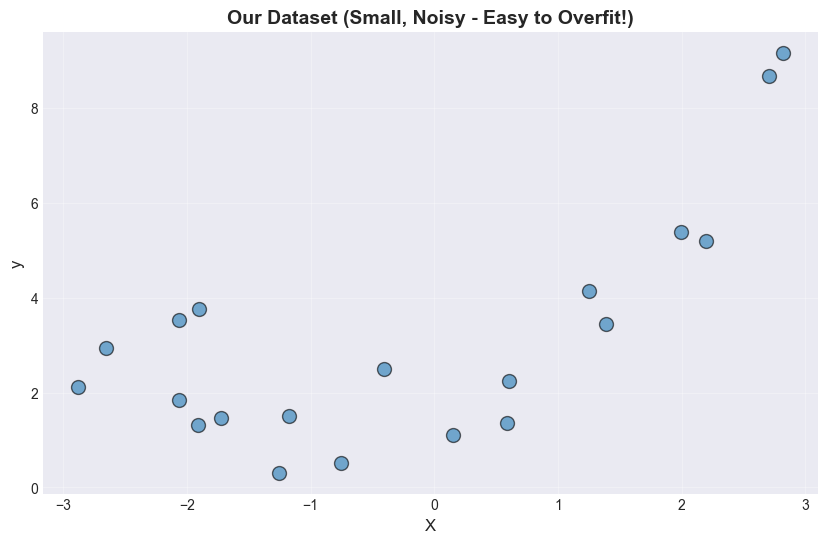

We have only 20 data points
With such little data, complex models will likely overfit!


In [8]:
# Generate quadratic data with noise
m = 20  # Small dataset (easier to overfit)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=100, alpha=0.6, edgecolors='black', linewidths=1)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Our Dataset (Small, Noisy - Easy to Overfit!)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f"We have only {m} data points")
print("With such little data, complex models will likely overfit!")

## Part 3: The Overfitting Problem in Action

Let's fit a high-degree polynomial without regularization:

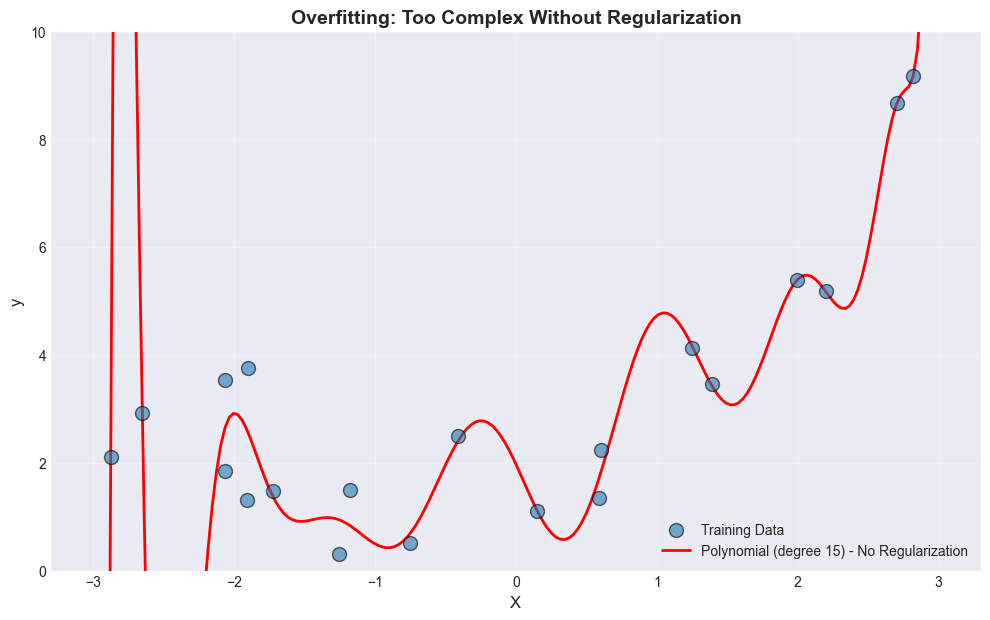


See how the line wiggles wildly?
It's trying too hard to hit every training point!
This model will perform poorly on new data.

Let's look at the model's coefficients (parameters):
Some coefficients are HUGE: [-5.65247978e+00 -4.52553194e+00  2.58486638e+01  1.37111843e+01
 -3.13928837e+01 -1.31526288e+01  1.80294197e+01  5.71159707e+00
 -5.59037369e+00 -1.22625881e+00  9.55800167e-01  1.26422008e-01
 -8.42391857e-02 -4.98204689e-03  2.97375746e-03]
These large coefficients cause the wild oscillations!


In [12]:
# Train a high-degree polynomial (degree 15)
poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Standard linear regression (no regularization)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Make predictions for plotting
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = lin_reg.predict(X_plot_poly)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, s=100, alpha=0.6, edgecolors='black', linewidths=1, label='Training Old', zorder=3)
plt.plot(X_plot, y_plot, 'r-', linewidth=2, label='Polynomial (degree 15) - No Regularization')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Overfitting: Too Complex Without Regularization', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(0, 10)
plt.show()

print("\nSee how the line wiggles wildly?")
print("It's trying too hard to hit every training point!")
print("This model will perform poorly on new data.")
print("\nLet's look at the model's coefficients (parameters):")
print(f"Some coefficients are HUGE: {lin_reg.coef_[:5].flatten()}")
print("These large coefficients cause the wild oscillations!")

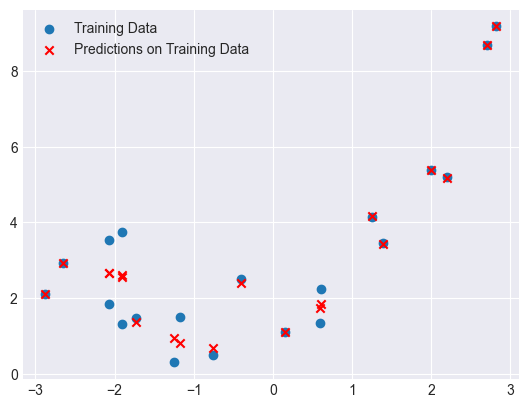

In [13]:
# Train on the 20 random points
lin_reg.fit(X_poly, y)

# Predict on the SAME training data
y_train_pred = lin_reg.predict(X_poly)  # ← Using X_poly (training data)

# Plot
plt.scatter(X, y, label='Training Old')
plt.scatter(X, y_train_pred, color='red', marker='x', label='Predictions on Training Old')
plt.legend()

y = β₀ + β₁x + β₂x² + β₃x³ + β₄x⁴ + ... + β₁₅x¹⁵


## With Your Values:

y = 1.973
    - 5.652·x
    - 4.526·x²
    + 25.849·x³
    + 13.711·x⁴
    - 31.393·x⁵
    - 13.153·x⁶
    + 18.029·x⁷
    + 5.712·x⁸
    - 5.590·x⁹
    - 1.226·x¹⁰
    + 0.956·x¹¹
    + 0.126·x¹²
    - 0.084·x¹³
    - 0.005·x¹⁴
    + 0.003·x¹⁵


In [29]:
print(lin_reg.coef_) # Is beta
print(lin_reg.intercept_) # Is beta 0

[[-5.65247978e+00 -4.52553194e+00  2.58486638e+01  1.37111843e+01
  -3.13928837e+01 -1.31526288e+01  1.80294197e+01  5.71159707e+00
  -5.59037369e+00 -1.22625881e+00  9.55800167e-01  1.26422008e-01
  -8.42391857e-02 -4.98204689e-03  2.97375746e-03]]
[1.97326811]


## Part 4: What is Regularization? (The Intuition)

### The Simple Idea:

Normal Linear Regression minimizes:
- **Just the error** on training data

Regularized Regression minimizes:
- **Error** on training data + **Penalty for large coefficients**

### Why This Helps:

By penalizing large coefficients, we:
1. Keep the model simpler
2. Prevent wild oscillations
3. Reduce overfitting
4. Improve generalization to new data

### An Analogy:

Think of it like a budget:
- Without regularization: Spend as much as you want on coefficients
- With regularization: You have a limited budget - spend wisely!

The model has to choose: "Which features are REALLY important?"

### The Math (Optional - Don't Panic!):

**Without Regularization:**
- Minimize: MSE (Mean Squared Error)

**With Regularization:**
- Minimize: MSE + α × (penalty term)

Where **α (alpha)** controls how much we penalize complexity:
- α = 0: No regularization (standard linear regression)
- α small: Light regularization
- α large: Strong regularization (very simple model)

## Part 5: Ridge Regression (L2 Regularization)

### What is Ridge Regression?

Ridge adds a penalty based on the **square** of the coefficients (that's why it's called L2).

**Ridge minimizes:** MSE + α × (sum of squared coefficients)

### What Ridge Does:
- Shrinks ALL coefficients toward zero
- But doesn't make them exactly zero
- Keeps all features (just reduces their impact)

### When to Use Ridge:
- When you think all features are at least a little bit useful
- When you want to prevent overfitting but keep all features
- It's a safe default choice!

Following the book (Chapter 4, pages 25-27):

/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.46239e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


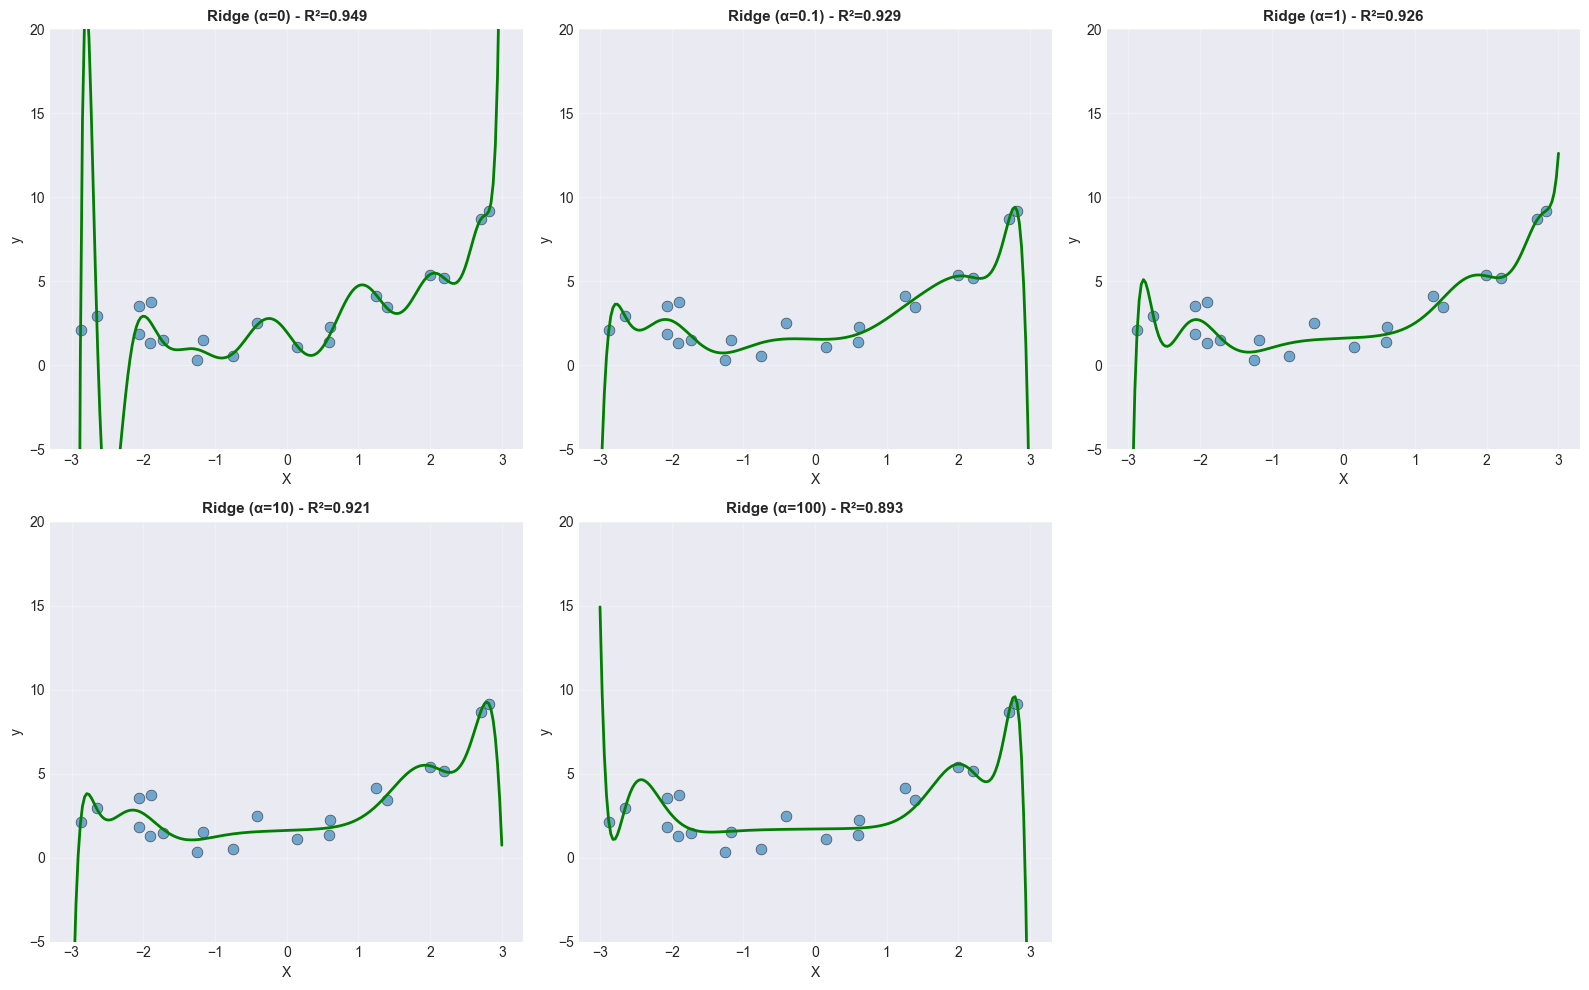


Observations:

1. α = 0 (top-left): Same as no regularization - Overfits!

2. α = 0.1 (top-middle): Light regularization - Still a bit wiggly

3. α = 1 (top-right): Moderate regularization - Getting better!

4. α = 10 (bottom-left): Strong regularization - Smooth curve!

5. α = 100 (bottom-middle): Too much regularization - Underfitting!

The key is finding the RIGHT alpha value!


In [30]:
# Let's try Ridge Regression with different alpha values
alphas = [0, 0.1, 1, 10, 100]

plt.figure(figsize=(16, 10))

for idx, alpha in enumerate(alphas):
    plt.subplot(2, 3, idx + 1)
    
    # Train Ridge model
    ridge_reg = Ridge(alpha=alpha, solver='cholesky')
    ridge_reg.fit(X_poly, y)
    
    # Make predictions
    y_ridge = ridge_reg.predict(X_plot_poly)
    
    # Calculate R² score
    r2 = ridge_reg.score(X_poly, y)
    
    # Plot
    plt.scatter(X, y, s=60, alpha=0.6, edgecolors='black', linewidths=0.5)
    plt.plot(X_plot, y_ridge, 'g-', linewidth=2)
    plt.xlabel('X', fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.title(f'Ridge (α={alpha}) - R²={r2:.3f}', fontsize=11, fontweight='bold')
    plt.ylim(-5, 20)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("\n1. α = 0 (top-left): Same as no regularization - Overfits!")
print("\n2. α = 0.1 (top-middle): Light regularization - Still a bit wiggly")
print("\n3. α = 1 (top-right): Moderate regularization - Getting better!")
print("\n4. α = 10 (bottom-left): Strong regularization - Smooth curve!")
print("\n5. α = 100 (bottom-middle): Too much regularization - Underfitting!")
print("\nThe key is finding the RIGHT alpha value!")

## Part 7: Lasso Regression (L1 Regularization)

### What is Lasso Regression?

Lasso adds a penalty based on the **absolute value** of coefficients (that's why it's called L1).

**Lasso minimizes:** MSE + α × (sum of absolute values of coefficients)

### What Lasso Does (The Magic!):
- Shrinks coefficients toward zero
- **Can make some coefficients EXACTLY zero!**
- Automatically performs feature selection
- Creates sparse models (many zeros)

### When to Use Lasso:
- When you suspect only a few features are actually important
- When you want automatic feature selection
- When you want a simple, interpretable model

### Ridge vs. Lasso:
- **Ridge:** Shrinks all coefficients, keeps all features
- **Lasso:** Eliminates some features entirely (sets coefficients to zero)

Following the book (Chapter 4, pages 27-29):

/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.339e+00, tolerance: 1.129e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

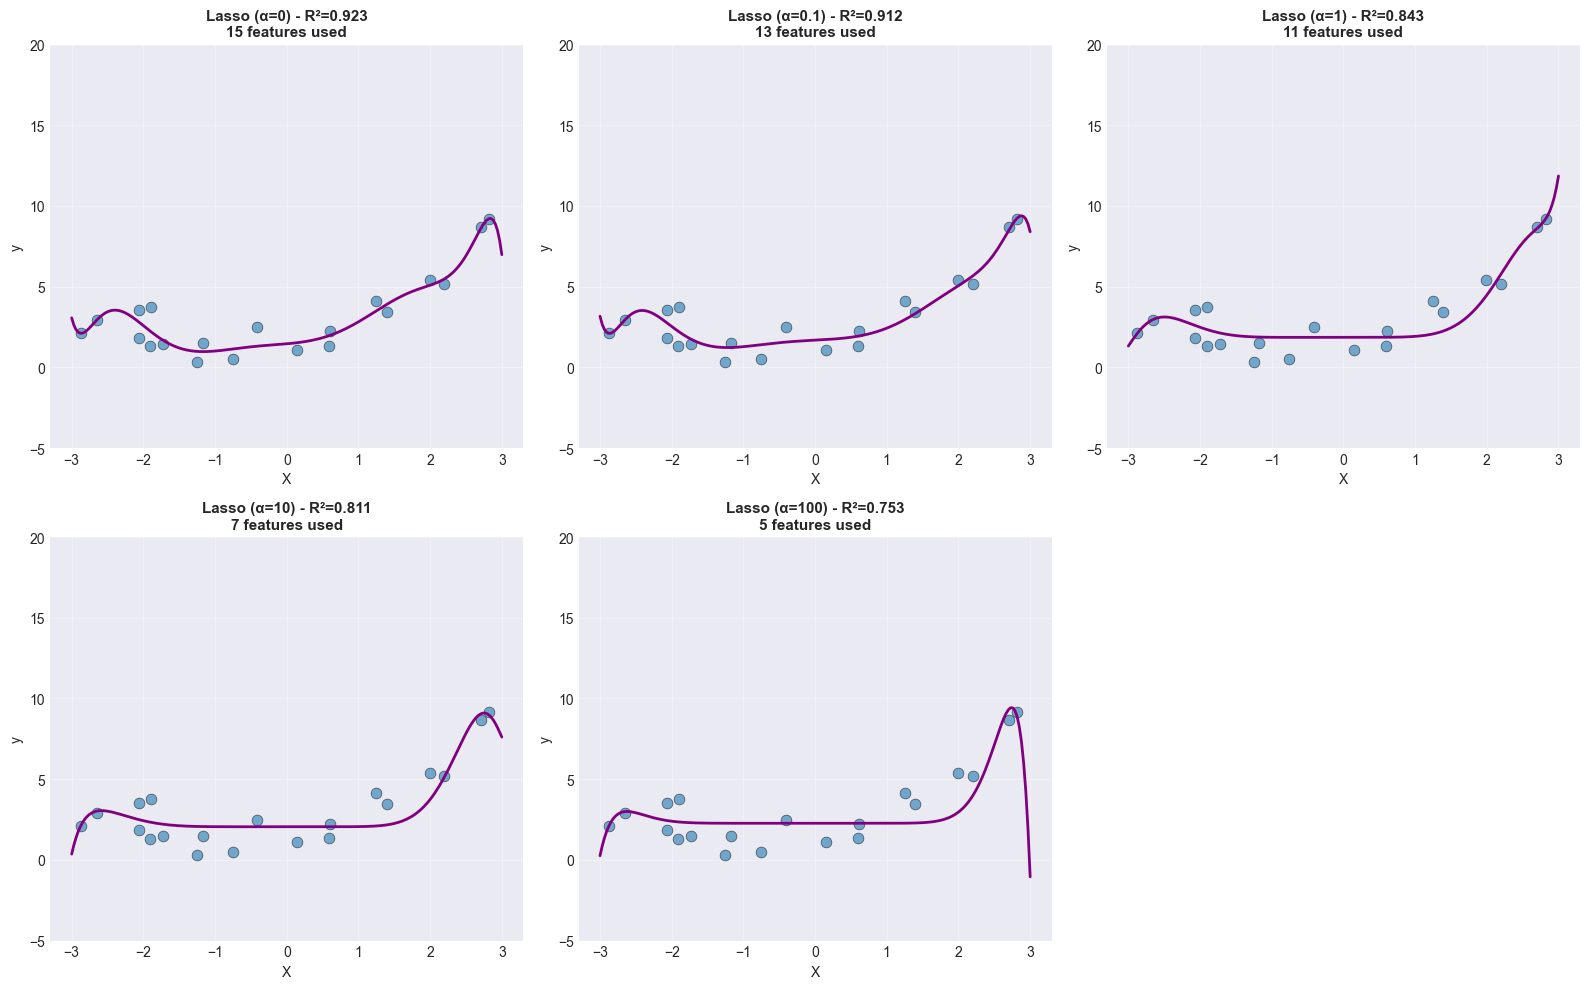


Observations:

1. α = 0 (no regularization): Uses all features

2. As α increases, Lasso uses FEWER features

3. With α = 100, very few features are used (sparse model)

Lasso automatically selects the most important features!


In [20]:
# Let's try Lasso Regression with different alpha values
plt.figure(figsize=(16, 10))

for idx, alpha in enumerate(alphas):
    plt.subplot(2, 3, idx + 1)
    
    # Train Lasso model
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_poly, y)
    
    # Make predictions
    y_lasso = lasso_reg.predict(X_plot_poly)
    
    # Calculate R² score
    r2 = lasso_reg.score(X_poly, y)
    
    # Count non-zero coefficients
    n_nonzero = np.sum(lasso_reg.coef_ != 0)
    
    # Plot
    plt.scatter(X, y, s=60, alpha=0.6, edgecolors='black', linewidths=0.5)
    plt.plot(X_plot, y_lasso, 'purple', linewidth=2)
    plt.xlabel('X', fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.title(f'Lasso (α={alpha}) - R²={r2:.3f}\n{n_nonzero} features used', 
             fontsize=11, fontweight='bold')
    plt.ylim(-5, 20)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("\n1. α = 0 (no regularization): Uses all features")
print("\n2. As α increases, Lasso uses FEWER features")
print("\n3. With α = 100, very few features are used (sparse model)")
print("\nLasso automatically selects the most important features!")

## Part 8: Lasso's Feature Selection Power

Let's see how Lasso eliminates features:

/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.735e+00, tolerance: 1.129e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.171e+00, tolerance: 1.129e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

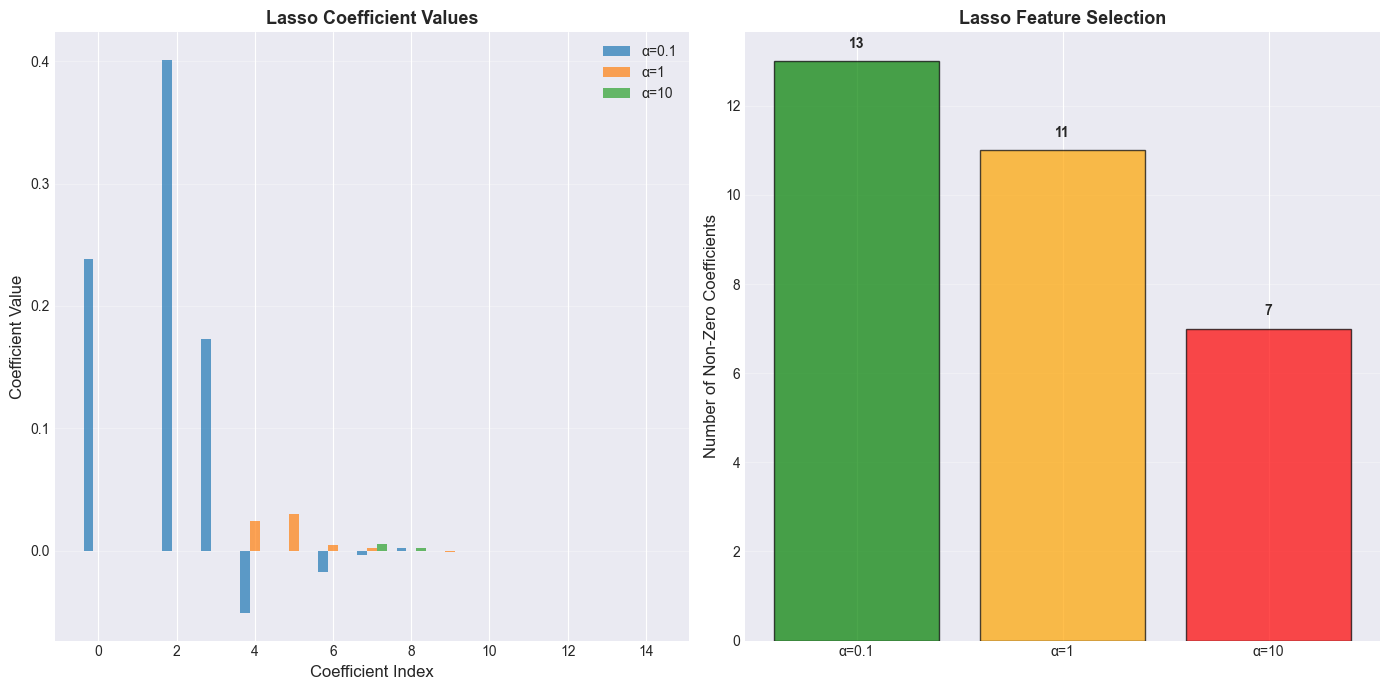


See the magic of Lasso?

α=0.1: Uses 13 features
α=1: Uses 11 features
α=10: Uses only 7 features!

Many coefficients are EXACTLY zero!
Lasso automatically decided which features to keep!


In [23]:
# Train Lasso models with different alpha values
lasso_01 = Lasso(alpha=0.1, max_iter=10000)
lasso_01.fit(X_poly, y)

lasso_1 = Lasso(alpha=1, max_iter=10000)
lasso_1.fit(X_poly, y)

lasso_10 = Lasso(alpha=10, max_iter=10000)
lasso_10.fit(X_poly, y)



###### Plotting the coefficients
# Plot coefficient values
plt.figure(figsize=(14, 7))

# Subplot 1: Coefficient values
plt.subplot(1, 2, 1)
x_pos = np.arange(len(lasso_01.coef_))
width = 0.25

plt.bar(x_pos - width, lasso_01.coef_.flatten(), width, label='α=0.1', alpha=0.7)
plt.bar(x_pos, lasso_1.coef_.flatten(), width, label='α=1', alpha=0.7)
plt.bar(x_pos + width, lasso_10.coef_.flatten(), width, label='α=10', alpha=0.7)

plt.xlabel('Coefficient Index', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Lasso Coefficient Values', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

# Subplot 2: Number of non-zero coefficients
plt.subplot(1, 2, 2)
alpha_values = [0.1, 1, 10]
n_features = [np.sum(lasso_01.coef_ != 0),
             np.sum(lasso_1.coef_ != 0),
             np.sum(lasso_10.coef_ != 0)]

colors = ['green', 'orange', 'red']
plt.bar(range(len(alpha_values)), n_features, color=colors, alpha=0.7, edgecolor='black')
plt.xticks(range(len(alpha_values)), [f'α={a}' for a in alpha_values])
plt.ylabel('Number of Non-Zero Coefficients', fontsize=12)
plt.title('Lasso Feature Selection', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(n_features):
    plt.text(i, v + 0.3, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nSee the magic of Lasso?")
print(f"\nα=0.1: Uses {n_features[0]} features")
print(f"α=1: Uses {n_features[1]} features")
print(f"α=10: Uses only {n_features[2]} features!")
print("\nMany coefficients are EXACTLY zero!")
print("Lasso automatically decided which features to keep!")

## Part 9: Ridge vs. Lasso - Side by Side Comparison

/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.171e+00, tolerance: 1.129e-02
  model = cd_fast.enet_coordinate_descent(


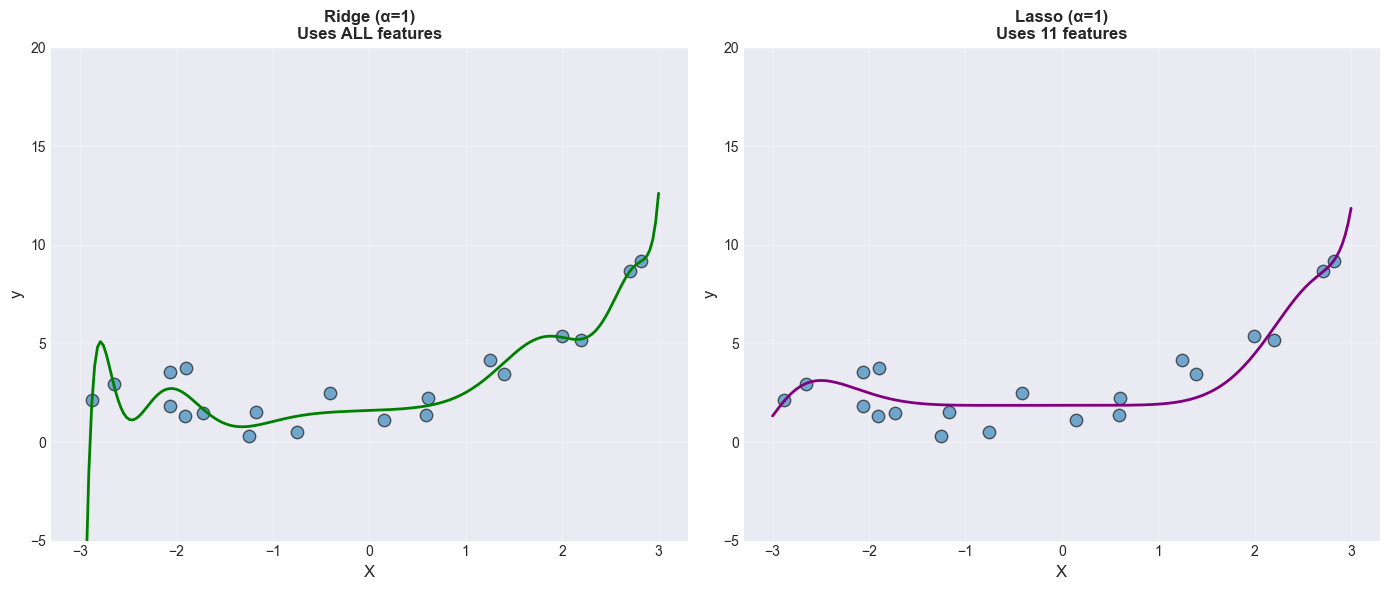


Key Differences:

RIDGE:
- Shrinks all coefficients
- Keeps all features
- Good when all features contribute a little

LASSO:
- Eliminates some features (sets coefficients to zero)
- Automatic feature selection
- Good when only few features are important
- Creates simpler, more interpretable models


In [31]:
# Compare Ridge and Lasso with the same alpha
alpha = 1

ridge = Ridge(alpha=alpha, solver='cholesky')
ridge.fit(X_poly, y)
y_ridge = ridge.predict(X_plot_poly)

lasso = Lasso(alpha=alpha, max_iter=10000)
lasso.fit(X_poly, y)
y_lasso = lasso.predict(X_plot_poly)

# Plot models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ridge
axes[0].scatter(X, y, s=80, alpha=0.6, edgecolors='black', linewidths=1)
axes[0].plot(X_plot, y_ridge, 'g-', linewidth=2)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title(f'Ridge (α={alpha})\nUses ALL features', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-5, 20)

# Lasso
axes[1].scatter(X, y, s=80, alpha=0.6, edgecolors='black', linewidths=1)
axes[1].plot(X_plot, y_lasso, 'purple', linewidth=2)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
n_lasso = np.sum(lasso.coef_ != 0)
axes[1].set_title(f'Lasso (α={alpha})\nUses {n_lasso} features', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-5, 20)

plt.tight_layout()
plt.show()

print("\nKey Differences:")
print("\nRIDGE:")
print("- Shrinks all coefficients")
print("- Keeps all features")
print("- Good when all features contribute a little")
print("\nLASSO:")
print("- Eliminates some features (sets coefficients to zero)")
print("- Automatic feature selection")
print("- Good when only few features are important")
print("- Creates simpler, more interpretable models")

## Part 10: ElasticNet - Best of Both Worlds

### What is ElasticNet?

ElasticNet combines Ridge and Lasso!

**ElasticNet minimizes:** MSE + α × (r × L1 penalty + (1-r) × L2 penalty)

Where:
- **α**: Overall regularization strength
- **r** (l1_ratio): Mix between L1 and L2
  - r = 0: Pure Ridge
  - r = 1: Pure Lasso
  - r = 0.5: Equal mix

### Why ElasticNet?
- Gets benefits from both Ridge and Lasso
- More stable than Lasso when features are correlated
- Still does feature selection (like Lasso)
- But more robust (like Ridge)

### When to Use ElasticNet:
- When you have many correlated features
- When you want feature selection but Lasso is unstable
- As a safe middle ground

Following the book (Chapter 4, page 29):

/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.576e+00, tolerance: 1.129e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.604e+00, tolerance: 1.129e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/sk

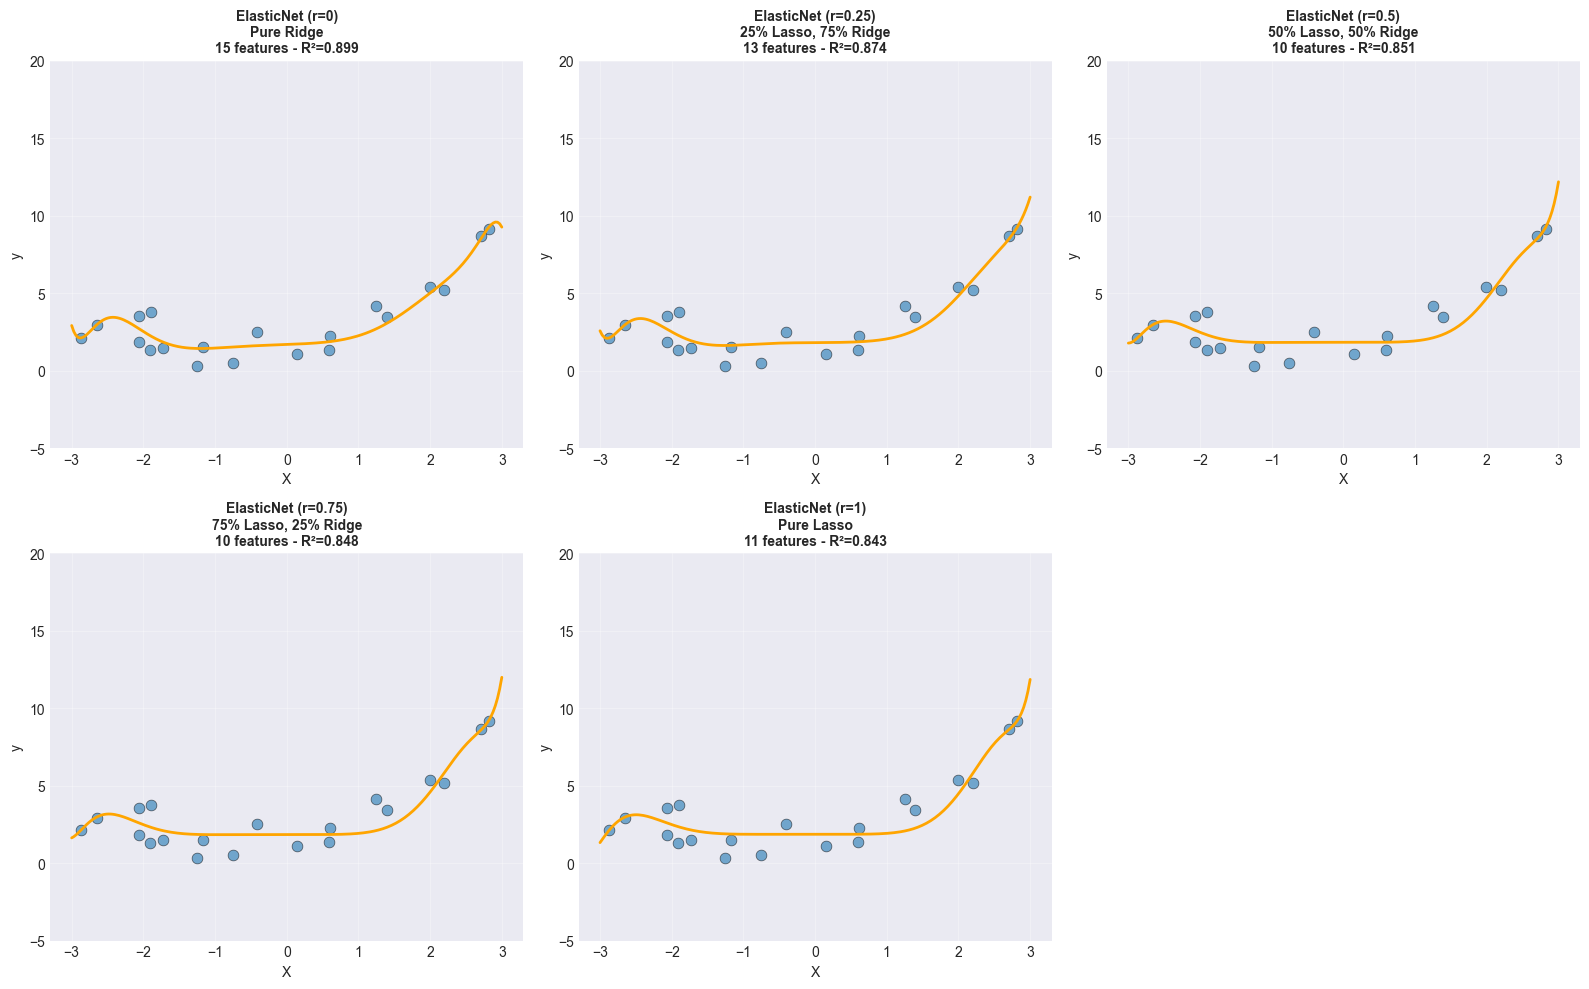


See how ElasticNet transitions from Ridge to Lasso!

r=0: Pure Ridge - keeps all features
r=0.25: Mostly Ridge - keeps most features
r=0.5: Equal mix - balanced approach
r=0.75: Mostly Lasso - eliminates many features
r=1: Pure Lasso - aggressive feature selection


In [32]:
# Try ElasticNet with different l1_ratio values
l1_ratios = [0, 0.25, 0.5, 0.75, 1]
alpha = 1

plt.figure(figsize=(16, 10))

for idx, l1_ratio in enumerate(l1_ratios):
    plt.subplot(2, 3, idx + 1)
    
    # Train ElasticNet model
    elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    elastic.fit(X_poly, y)
    
    # Make predictions
    y_elastic = elastic.predict(X_plot_poly)
    
    # Calculate metrics
    r2 = elastic.score(X_poly, y)
    n_nonzero = np.sum(elastic.coef_ != 0)
    
    # Determine type
    if l1_ratio == 0:
        type_str = "Pure Ridge"
    elif l1_ratio == 1:
        type_str = "Pure Lasso"
    else:
        type_str = f"{int(l1_ratio*100)}% Lasso, {int((1-l1_ratio)*100)}% Ridge"
    
    # Plot
    plt.scatter(X, y, s=60, alpha=0.6, edgecolors='black', linewidths=0.5)
    plt.plot(X_plot, y_elastic, 'orange', linewidth=2)
    plt.xlabel('X', fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.title(f'ElasticNet (r={l1_ratio})\n{type_str}\n{n_nonzero} features - R²={r2:.3f}', 
             fontsize=10, fontweight='bold')
    plt.ylim(-5, 20)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSee how ElasticNet transitions from Ridge to Lasso!")
print("\nr=0: Pure Ridge - keeps all features")
print("r=0.25: Mostly Ridge - keeps most features")
print("r=0.5: Equal mix - balanced approach")
print("r=0.75: Mostly Lasso - eliminates many features")
print("r=1: Pure Lasso - aggressive feature selection")

## Part 11: Early Stopping - A Different Approach

### What is Early Stopping?

Early stopping is a regularization technique for **iterative learning algorithms** (like Gradient Descent).

### The Idea:
1. Train your model iteratively
2. Monitor performance on validation set
3. Stop training when validation error starts increasing
4. Even if training error is still decreasing!

### Why It Works:
- As training progresses, model fits training data better and better
- At some point, it starts overfitting
- Training error keeps going down
- But validation error starts going UP
- That's when we STOP!

### Visual Explanation:
```
Error
  ^
  |                    /---- Validation error
  |                   /      (starts increasing!)
  |                  /
  |            -----+         <--- STOP HERE!
  |                 \
  |                  \_____ Training error
  |                         (keeps decreasing)
  +----------------------------> Iterations
```

Following the book (Chapter 4, page 30):

In [ ]:
# Let's demonstrate early stopping with SGD Regressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Prepare data
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Train with early stopping
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, 
                       eta0=0.01, random_state=42,
                       early_stopping=True, validation_fraction=0.2, n_iter_no_change=5)

sgd_reg.fit(X_train, y_train.ravel())

print("Early Stopping Example:")
print(f"\nTraining stopped after {sgd_reg.n_iter_} iterations")
print("(Before reaching max_iter = 1000)")
print("\nWhy? Validation error stopped improving!")
print("\nThis prevents overfitting by stopping at the right time.")
print("\nEarly stopping is especially useful for:")
print("- Neural networks")
print("- Gradient boosting")
print("- Any iterative learning algorithm")

## Part 12: Feature Scaling and Regularization

### IMPORTANT: Always Scale Features for Regularization!

**Why?**

Regularization penalizes large coefficients. But:
- If features are on different scales (e.g., one feature is 0-1, another is 0-1000)
- The coefficients will be on different scales too
- Regularization will unfairly penalize some features!

**Solution:** Scale all features to the same range first!

### StandardScaler:
Transforms features to have:
- Mean = 0
- Standard deviation = 1

This ensures fair treatment of all features!

In [33]:
# Compare: with and without scaling
from sklearn.pipeline import Pipeline

# Create synthetic data with different scales
X_unscaled = np.random.randn(100, 3)
X_unscaled[:, 0] *= 1      # Feature 1: scale of 1
X_unscaled[:, 1] *= 100    # Feature 2: scale of 100
X_unscaled[:, 2] *= 0.01   # Feature 3: scale of 0.01

y_synth = 3*X_unscaled[:, 0] + 2*X_unscaled[:, 1] + 5*X_unscaled[:, 2] + np.random.randn(100)

# WITHOUT scaling
ridge_no_scale = Ridge(alpha=1)
ridge_no_scale.fit(X_unscaled, y_synth)

# WITH scaling
ridge_with_scale = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1))
])
ridge_with_scale.fit(X_unscaled, y_synth)

print("Feature Scales:")
print(f"Feature 1: Mean scale = {np.std(X_unscaled[:, 0]):.2f}")
print(f"Feature 2: Mean scale = {np.std(X_unscaled[:, 1]):.2f}")
print(f"Feature 3: Mean scale = {np.std(X_unscaled[:, 2]):.2f}")

print("\nCoefficients WITHOUT scaling:")
print(ridge_no_scale.coef_)
print("(Regularization unfairly penalizes Feature 2!)")

print("\nCoefficients WITH scaling:")
print(ridge_with_scale.named_steps['ridge'].coef_)
print("(Fair treatment of all features!)")

print("\n\nKEY LESSON: Always use StandardScaler before regularization!")

Feature Scales:
Feature 1: Mean scale = 0.99
Feature 2: Mean scale = 107.55
Feature 3: Mean scale = 0.01

Coefficients WITHOUT scaling:
[3.00115811 2.00185556 0.22685521]
(Regularization unfairly penalizes Feature 2!)

Coefficients WITH scaling:
[  3.01870959 213.16266972   0.23978164]
(Fair treatment of all features!)


KEY LESSON: Always use StandardScaler before regularization!


## Part 13: Which Regularization to Use? (Decision Guide)

### Quick Decision Tree:

```
Do you have many features?
│
├─ NO (few features) → Start with Ridge
│
└─ YES (many features)
   │
   ├─ Do you think only a few features are important?
   │  │
   │  ├─ YES → Use Lasso (feature selection)
   │  │
   │  └─ NOT SURE → Use ElasticNet (safe middle ground)
   │
   └─ Are features highly correlated?
      │
      ├─ YES → Use Ridge or ElasticNet
      │
      └─ NO → Lasso is fine
```

### Rule of Thumb:

**When in doubt:**
1. Try Ridge first (safe default)
2. Try Lasso if you want feature selection
3. Try ElasticNet if Lasso is unstable
4. Use cross-validation to pick the best alpha!

### Summary Table:

| Method | Shrinks Coefficients | Feature Selection | Best For |
|--------|---------------------|-------------------|----------|
| **Ridge** | Yes | No | Default choice, correlated features |
| **Lasso** | Yes | Yes | Sparse models, few important features |
| **ElasticNet** | Yes | Yes | Mix of Ridge/Lasso, correlated features |
| **Early Stopping** | N/A | No | Iterative algorithms (Neural Networks) |

## Part 14: Practical Example - Real Dataset

Let's apply what we learned to a realistic scenario!

In [37]:
# Create a realistic dataset: House prices with many features
np.random.seed(42)
n_samples = 100

# Features: size, bedrooms, bathrooms, age, distance_to_city, crime_rate, school_rating
size = np.random.uniform(1000, 3000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)
age = np.random.uniform(0, 50, n_samples)
distance = np.random.uniform(1, 30, n_samples)
crime = np.random.uniform(0, 10, n_samples)
school = np.random.uniform(1, 10, n_samples)

# Some features are IRRELEVANT (noise)
noise1 = np.random.randn(n_samples)
noise2 = np.random.randn(n_samples)
noise3 = np.random.randn(n_samples)

X_houses = np.column_stack([size, bedrooms, bathrooms, age, distance, crime, school,
                            noise1, noise2, noise3])

# True relationship (only first 7 features matter!)
y_houses = (
    0.2 * size +           # Size matters a lot
    20000 * bedrooms +     # More bedrooms = higher price
    15000 * bathrooms +    # More bathrooms = higher price
    -500 * age +           # Older = cheaper
    -2000 * distance +     # Further from city = cheaper
    -5000 * crime +        # More crime = cheaper
    10000 * school +       # Better schools = higher price
    np.random.randn(n_samples) * 20000  # Some noise
)

print("Dataset created!")
print(f"\nFeatures: {X_houses.shape[1]}")
print("- 7 relevant features")
print("- 3 irrelevant features (noise)")
print("\nLet's see which model can identify the important features!")

Dataset created!

Features: 10
- 7 relevant features
- 3 irrelevant features (noise)

Let's see which model can identify the important features!


In [41]:
# Split data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_houses, y_houses, test_size=0.2, random_state=42
)

# Create pipelines with scaling
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10))
])

lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=2500))
])

elastic_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet(alpha=1000, l1_ratio=0.5))
])

# Train models
ridge_pipe.fit(X_train_h, y_train_h)
lasso_pipe.fit(X_train_h, y_train_h)
elastic_pipe.fit(X_train_h, y_train_h)

# Evaluate
ridge_score = ridge_pipe.score(X_test_h, y_test_h)
lasso_score = lasso_pipe.score(X_test_h, y_test_h)
elastic_score = elastic_pipe.score(X_test_h, y_test_h)

print("Model Performance (R² on test set):")
print(f"\nRidge:      {ridge_score:.4f}")
print(f"Lasso:      {lasso_score:.4f}")
print(f"ElasticNet: {elastic_score:.4f}")

# Feature selection
ridge_coefs = ridge_pipe.named_steps['ridge'].coef_
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_
elastic_coefs = elastic_pipe.named_steps['elastic'].coef_

print("\nFeatures Used:")
print(f"Ridge:      {np.sum(np.abs(ridge_coefs) > 0.01)} features")
print(f"Lasso:      {np.sum(lasso_coefs != 0)} features")
print(f"ElasticNet: {np.sum(elastic_coefs != 0)} features")

Model Performance (R² on test set):

Ridge:      0.8491
Lasso:      0.8402
ElasticNet: -0.0032

Features Used:
Ridge:      10 features
Lasso:      7 features
ElasticNet: 10 features


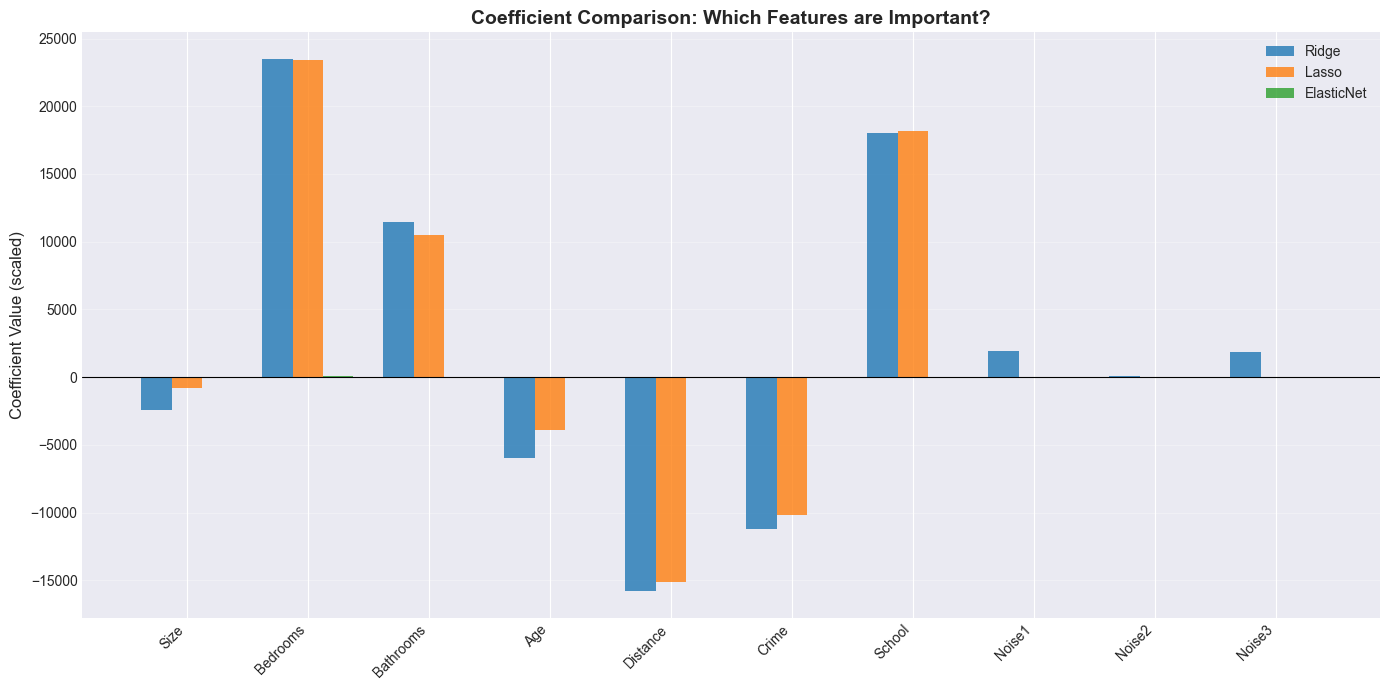


Observations:

1. Ridge keeps all features (including noise)
   - But shrinks them all

2. Lasso eliminates the noise features!
   - Sets Noise1, Noise2, Noise3 to zero
   - Keeps only the important features

3. ElasticNet is in between
   - Eliminates most noise
   - More stable than Lasso

Lasso successfully identified the 7 important features!


In [42]:
# Visualize coefficients
feature_names = ['Size', 'Bedrooms', 'Bathrooms', 'Age', 'Distance', 
                'Crime', 'School', 'Noise1', 'Noise2', 'Noise3']

x_pos = np.arange(len(feature_names))
width = 0.25

plt.figure(figsize=(14, 7))
plt.bar(x_pos - width, ridge_coefs, width, label='Ridge', alpha=0.8)
plt.bar(x_pos, lasso_coefs, width, label='Lasso', alpha=0.8)
plt.bar(x_pos + width, elastic_coefs, width, label='ElasticNet', alpha=0.8)

plt.xticks(x_pos, feature_names, rotation=45, ha='right')
plt.ylabel('Coefficient Value (scaled)', fontsize=12)
plt.title('Coefficient Comparison: Which Features are Important?', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\nObservations:")
print("\n1. Ridge keeps all features (including noise)")
print("   - But shrinks them all")
print("\n2. Lasso eliminates the noise features!")
print("   - Sets Noise1, Noise2, Noise3 to zero")
print("   - Keeps only the important features")
print("\n3. ElasticNet is in between")
print("   - Eliminates most noise")
print("   - More stable than Lasso")
print("\nLasso successfully identified the 7 important features!")

## Part 15: Practice Exercise - Your Turn!

Now you try! Let's work with a student performance dataset.

In [ ]:
# Student exam score prediction
# Features: study_hours, sleep_hours, previous_score, attendance, stress_level
np.random.seed(42)
n = 80

study = np.random.uniform(0, 10, n)
sleep = np.random.uniform(4, 10, n)
prev_score = np.random.uniform(50, 100, n)
attendance = np.random.uniform(60, 100, n)
stress = np.random.uniform(1, 10, n)

X_students = np.column_stack([study, sleep, prev_score, attendance, stress])
y_students = (
    3 * study + 
    1 * sleep + 
    0.5 * prev_score + 
    0.2 * attendance - 
    2 * stress + 
    np.random.randn(n) * 5
)

# TODO 1: Split into train and test sets
# Hint: Use train_test_split


# TODO 2: Create and train a Ridge model (with scaling!)
# Hint: Use Pipeline with StandardScaler and Ridge


# TODO 3: Create and train a Lasso model (with scaling!)


# TODO 4: Compare R² scores on test set


# TODO 5: Which features does Lasso eliminate (if any)?


print("\nGive it a try! Check the solution below when you're done.")

## Solution (Try first!)

In [ ]:
# SOLUTION

# 1. Split data
X_tr, X_te, y_tr, y_te = train_test_split(X_students, y_students, test_size=0.2, random_state=42)

# 2. Ridge model
ridge_student = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1))
])
ridge_student.fit(X_tr, y_tr)

# 3. Lasso model
lasso_student = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])
lasso_student.fit(X_tr, y_tr)

# 4. Compare scores
ridge_r2 = ridge_student.score(X_te, y_te)
lasso_r2 = lasso_student.score(X_te, y_te)

print("Performance Comparison:")
print(f"Ridge R²:  {ridge_r2:.4f}")
print(f"Lasso R²:  {lasso_r2:.4f}")

# 5. Feature selection
ridge_coef = ridge_student.named_steps['ridge'].coef_
lasso_coef = lasso_student.named_steps['lasso'].coef_

features = ['Study Hours', 'Sleep Hours', 'Previous Score', 'Attendance', 'Stress Level']

print("\nCoefficients:")
print("\nFeature          Ridge      Lasso")
print("-" * 40)
for feat, r, l in zip(features, ridge_coef, lasso_coef):
    print(f"{feat:15s}  {r:7.3f}    {l:7.3f}")

# Visualize
x_pos = np.arange(len(features))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x_pos - width/2, ridge_coef, width, label='Ridge', alpha=0.8)
plt.bar(x_pos + width/2, lasso_coef, width, label='Lasso', alpha=0.8)
plt.xticks(x_pos, features, rotation=45, ha='right')
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Student Performance: Ridge vs. Lasso', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\nGreat job! Both models perform similarly.")
print("Lasso might eliminate some features if alpha is higher.")
print("All features seem somewhat important for predicting student scores!")

## Part 16: Key Takeaways

### What You Learned Today:

1. **Regularization prevents overfitting** by penalizing complex models

2. **Three main types:**
   - **Ridge (L2):** Shrinks all coefficients, keeps all features
   - **Lasso (L1):** Shrinks coefficients, eliminates some features
   - **ElasticNet:** Combines Ridge and Lasso

3. **Alpha (α) controls regularization strength:**
   - α = 0: No regularization
   - Small α: Light regularization
   - Large α: Strong regularization

4. **Lasso does automatic feature selection** (sets some coefficients to zero)

5. **Always scale features before regularization!** (Use StandardScaler)

6. **Early Stopping** is regularization for iterative algorithms

7. **When in doubt, start with Ridge!**

### The Big Picture:

```
Too Simple → Underfitting → Poor performance
    ↓
Just Right → Good Fit → Best performance ← (Use regularization to get here!)
    ↓
Too Complex → Overfitting → Poor generalization
```

Regularization helps you find the "just right" model!

## Part 17: Congratulations!

### You've Completed the Linear Models Series!

**You now understand:**
- ✅ Linear Regression (straight lines)
- ✅ Polynomial Regression (curves)
- ✅ Overfitting vs. Underfitting
- ✅ Learning Curves (diagnostics)
- ✅ Ridge, Lasso, ElasticNet (regularization)
- ✅ Early Stopping
- ✅ Feature scaling
- ✅ When to use which technique

### This is a HUGE Achievement!

These concepts form the foundation of machine learning. Everything else builds on this!

### What's Next?

1. Practice with the lab exercises
2. Try regularization on your own datasets
3. Experiment with different alpha values
4. Learn about cross-validation (to find the best alpha automatically)

### Your Homework:
1. Review all three notebooks
2. Complete the lab exercises
3. Try regularization on a dataset of your choice
4. Compare Ridge, Lasso, and ElasticNet

---

## You're Amazing!

**You went from knowing nothing about machine learning to understanding:**
- How models learn from data
- How to fit lines and curves
- How to diagnose and fix overfitting
- How to select important features automatically

**Be proud of yourself!**

**Keep practicing, keep learning, and remember:**

**Every expert was once a beginner. You're on your way!**

R² = 1 - (Σ(y_true - y_pred)²) / (Σ(y_true - y_mean)²)
       ↑                         ↑
    Your model's errors    Just guessing average
```